## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.3,0.5]
redice_lr_patient = [5,10]

In [12]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, min_lr=1e-12,
                                  monitor='val_loss', patience=reduce_patient,verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.30, reduce_patient: 5
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
b

Epoch 11/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.3131 - accuracy: 0.5427 - val_loss: 1.4900 - val_accuracy: 0.4801
Epoch 12/25
50000/50000 [==============================] - 5s 104us/step - loss: 1.2886 - accuracy: 0.5515 - val_loss: 1.4948 - val_accuracy: 0.4774
Epoch 13/25
50000/50000 [==============================] - 5s 101us/step - loss: 1.2667 - accuracy: 0.5599 - val_loss: 1.4897 - val_accuracy: 0.4754
Epoch 14/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.2446 - accuracy: 0.5678 - val_loss: 1.4708 - val_accuracy: 0.4822
Epoch 15/25
50000/50000 [==============================] - 5s 104us/step - loss: 1.2246 - accuracy: 0.5749 - val_loss: 1.4651 - val_accuracy: 0.4848
Epoch 16/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.2037 - accuracy: 0.5826 - val_loss: 1.4674 - val_accuracy: 0.4842
Epoch 17/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.1832 - accuracy: 0.5901

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 115us/step - loss: 2.2263 - accuracy: 0.2721 - val_loss: 2.1360 - val_accuracy: 0.2259
Epoch 2/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.7640 - accuracy: 0.3845 - val_loss: 1.9982 - val_accuracy: 0.2776
Epoch 3/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.6397 - accuracy: 0.4246 - val_loss: 1.8496 - val_accuracy: 0.3531
Epoch 4/25
50000/50000 [==============================] - 5s 103us/step - loss: 1.5623 - accuracy: 0.4512 - val_loss: 1.7228 - val_accuracy: 0.4036
Epoch 5/25
50000/50000 [==============================] - 5s 108us/step - loss: 1.5096 - accuracy: 0.4700 - val_loss: 1.6402 - val_accuracy: 0.4221
Epoch 6/25
50000/50000 [==============================] - 5s 103us/step - loss: 1.4648 - accuracy: 0.4862 - val_loss: 1.5863 - val_accuracy: 0.4389
Epoch 7/25
50000/50000 [==============================] - 5s 1

50000/50000 [==============================] - 5s 107us/step - loss: 0.5046 - accuracy: 0.8436 - val_loss: 1.5853 - val_accuracy: 0.5143

Epoch 00020: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 21/25
50000/50000 [==============================] - 5s 110us/step - loss: 0.4498 - accuracy: 0.8707 - val_loss: 1.4805 - val_accuracy: 0.5391
Epoch 22/25
50000/50000 [==============================] - 5s 107us/step - loss: 0.4341 - accuracy: 0.8774 - val_loss: 1.4933 - val_accuracy: 0.5336
Epoch 23/25
50000/50000 [==============================] - 5s 107us/step - loss: 0.4245 - accuracy: 0.8813 - val_loss: 1.5253 - val_accuracy: 0.5299
Epoch 24/25
50000/50000 [==============================] - 5s 110us/step - loss: 0.4177 - accuracy: 0.8828 - val_loss: 1.5234 - val_accuracy: 0.5326
Epoch 25/25
50000/50000 [==============================] - 5s 108us/step - loss: 0.4083 - accuracy: 0.8877 - val_loss: 1.5284 - val_accuracy: 0.5305

Epoch 00025: ReduceLROnPlateau reduc

50000/50000 [==============================] - 6s 111us/step - loss: 1.5752 - accuracy: 0.4475 - val_loss: 1.8404 - val_accuracy: 0.3443
Epoch 4/25
50000/50000 [==============================] - 5s 108us/step - loss: 1.5157 - accuracy: 0.4697 - val_loss: 1.7174 - val_accuracy: 0.3993
Epoch 5/25
50000/50000 [==============================] - 6s 113us/step - loss: 1.4717 - accuracy: 0.4862 - val_loss: 1.6381 - val_accuracy: 0.4227
Epoch 6/25
50000/50000 [==============================] - 7s 133us/step - loss: 1.4356 - accuracy: 0.5010 - val_loss: 1.5992 - val_accuracy: 0.4327
Epoch 7/25
50000/50000 [==============================] - 6s 120us/step - loss: 1.4060 - accuracy: 0.5101 - val_loss: 1.5557 - val_accuracy: 0.4455
Epoch 8/25
50000/50000 [==============================] - 7s 133us/step - loss: 1.3799 - accuracy: 0.5194 - val_loss: 1.5298 - val_accuracy: 0.4640
Epoch 9/25
50000/50000 [==============================] - 6s 128us/step - loss: 1.3564 - accuracy: 0.5287 - val_loss: 1.523

Epoch 23/25
50000/50000 [==============================] - 6s 118us/step - loss: 1.1294 - accuracy: 0.6155 - val_loss: 1.4394 - val_accuracy: 0.4920
Epoch 24/25
50000/50000 [==============================] - 6s 114us/step - loss: 1.1180 - accuracy: 0.6185 - val_loss: 1.4370 - val_accuracy: 0.4965
Epoch 25/25
50000/50000 [==============================] - 6s 113us/step - loss: 1.1073 - accuracy: 0.6224 - val_loss: 1.4405 - val_accuracy: 0.4941
Numbers of exp: 8, reduce_factor: 0.30, reduce_patient: 5
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_37 (Batc (None, 256)               1024      
_______________

50000/50000 [==============================] - 6s 127us/step - loss: 1.3981 - accuracy: 0.5092 - val_loss: 1.5911 - val_accuracy: 0.4325
Epoch 7/25
50000/50000 [==============================] - 6s 123us/step - loss: 1.3546 - accuracy: 0.5281 - val_loss: 1.5389 - val_accuracy: 0.4525
Epoch 8/25
50000/50000 [==============================] - 7s 139us/step - loss: 1.3148 - accuracy: 0.5390 - val_loss: 1.5441 - val_accuracy: 0.4568
Epoch 9/25
50000/50000 [==============================] - 7s 144us/step - loss: 1.2830 - accuracy: 0.5530 - val_loss: 1.5227 - val_accuracy: 0.4629
Epoch 10/25
50000/50000 [==============================] - 8s 157us/step - loss: 1.2511 - accuracy: 0.5644 - val_loss: 1.5213 - val_accuracy: 0.4603
Epoch 11/25
50000/50000 [==============================] - 8s 150us/step - loss: 1.2230 - accuracy: 0.5745 - val_loss: 1.4895 - val_accuracy: 0.4701
Epoch 12/25
50000/50000 [==============================] - 7s 137us/step - loss: 1.1962 - accuracy: 0.5849 - val_loss: 1.

50000/50000 [==============================] - 7s 135us/step - loss: 1.2264 - accuracy: 0.5777 - val_loss: 1.5171 - val_accuracy: 0.4700
Numbers of exp: 11, reduce_factor: 0.50, reduce_patient: 10
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_47 (Batc (None, 256)               1024      
___________________________________________________________

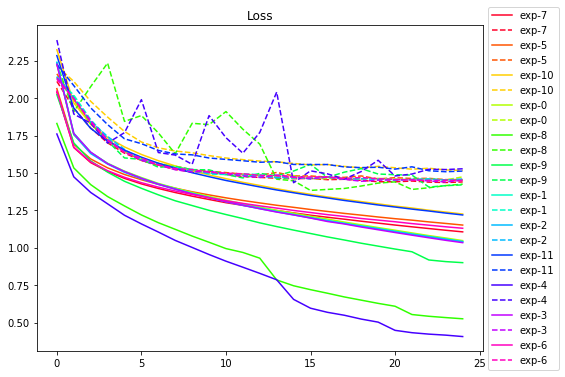

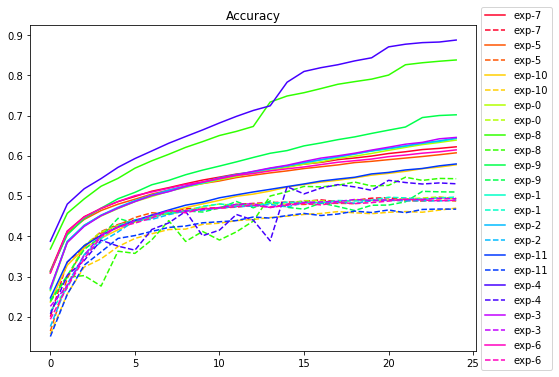

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()